# Download and Import Libraries

In [1]:
%%capture
%pip install pandas
%pip install openpyxl
%pip install scikit-learn
%pip install matplotlib
%pip install seaborn

In [2]:
# importing libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
# show all columns instead of truncating
pd.set_option('display.max_columns', None)



# Global Functions

In [3]:
def evaluate_model(y_test, y_pred, title):
    from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score, balanced_accuracy_score

    cm = confusion_matrix(y_test, y_pred)

    fig, ax = plt.subplots(figsize=(7, 5))
    ConfusionMatrixDisplay.from_predictions(
        y_test, y_pred,
        display_labels=["Very Low Risk", "Low Risk", "Medium Risk", "High Risk"],
        cmap="Blues",
        ax=ax,
        colorbar=False
    )
    ax.set_title(f"Confusion Matrix — {title}", fontsize=14, fontweight="bold")
    plt.tight_layout()
    plt.show()

    print("=" * 60)
    print("MULTI-CLASS CONFUSION MATRIX INTERPRETATION")
    print("=" * 60)

    print("\nClassification Report:\n")
    print(classification_report(y_test, y_pred))

    accuracy = accuracy_score(y_test, y_pred)
    print(f"\nOverall Accuracy = {accuracy:.1%}")

    print("\nKEY OBSERVATIONS:")

    labels = sorted(np.unique(y_test))

    for i, label in enumerate(labels):
        tp = cm[i, i]
        fn = cm[i, :].sum() - tp
        fp = cm[:, i].sum() - tp
        
        print(f"\nClass {label}:")
        print(f"  True Positives  = {tp}")
        print(f"  False Negatives = {fn} (Actual {label} predicted as other classes)")
        print(f"  False Positives = {fp} (Other classes predicted as {label})")

# Load Dataset + Initial Exploration

In [4]:
df1 = pd.read_excel('Dataset/Internal_Bank_Dataset.xlsx')
df1.head()

,PROSPECTID,Total_TL,Tot_Closed_TL,Tot_Active_TL,Total_TL_opened_L6M,Tot_TL_closed_L6M,pct_tl_open_L6M,pct_tl_closed_L6M,pct_active_tl,pct_closed_tl,Total_TL_opened_L12M,Tot_TL_closed_L12M,pct_tl_open_L12M,pct_tl_closed_L12M,Tot_Missed_Pmnt,Auto_TL,CC_TL,Consumer_TL,Gold_TL,Home_TL,PL_TL,Secured_TL,Unsecured_TL,Other_TL,Age_Oldest_TL,Age_Newest_TL
0,1,5,4,1,0,0,0.000,0.0,0.200,0.800,0,0,0.00,0.0,0,0,0,0,1,0,4,1,4,0,72,18
1,2,1,0,1,0,0,0.000,0.0,1.000,0.000,1,0,1.00,0.0,0,0,0,1,0,0,0,0,1,0,7,7
2,3,8,0,8,1,0,0.125,0.0,1.000,0.000,2,0,0.25,0.0,1,1,0,6,1,0,0,2,6,0,47,2
3,4,1,0,1,1,0,1.000,0.0,1.000,0.000,1,0,1.00,0.0,1,0,0,0,0,0,0,0,1,1,5,5
4,5,3,2,1,0,0,0.000,0.0,0.333,0.667,0,0,0.00,0.0,0,1,0,0,0,0,0,3,0,2,131,32


In [5]:
df2 = pd.read_excel('Dataset/External_Cibil_Dataset.xlsx')
df2.head()

,PROSPECTID,time_since_recent_payment,time_since_first_deliquency,time_since_recent_deliquency,num_times_delinquent,max_delinquency_level,max_recent_level_of_deliq,num_deliq_6mts,num_deliq_12mts,num_deliq_6_12mts,max_deliq_6mts,max_deliq_12mts,num_times_30p_dpd,num_times_60p_dpd,num_std,num_std_6mts,num_std_12mts,num_sub,num_sub_6mts,num_sub_12mts,num_dbt,num_dbt_6mts,num_dbt_12mts,num_lss,num_lss_6mts,num_lss_12mts,recent_level_of_deliq,tot_enq,CC_enq,CC_enq_L6m,CC_enq_L12m,PL_enq,PL_enq_L6m,PL_enq_L12m,time_since_recent_enq,enq_L12m,enq_L6m,enq_L3m,MARITALSTATUS,EDUCATION,AGE,GENDER,NETMONTHLYINCOME,Time_With_Curr_Empr,pct_of_active_TLs_ever,pct_opened_TLs_L6m_of_L12m,pct_currentBal_all_TL,CC_utilization,CC_Flag,PL_utilization,PL_Flag,pct_PL_enq_L6m_of_L12m,pct_CC_enq_L6m_of_L12m,pct_PL_enq_L6m_of_ever,pct_CC_enq_L6m_of_ever,max_unsec_exposure_inPct,HL_Flag,GL_Flag,last_prod_enq2,first_prod_enq2,Credit_Score,Approved_Flag
0,1,549,35,15,11,29,29,0,0,0,-99999,-99999,0,0,21,5,11,0,0,0,0,0,0,0,0,0,29,6,0,0,0,6,0,0,566,0,0,0,Married,12TH,48,M,51000,114,0.200,0.0,0.798,-99999.0,0,0.798,1,0.0,0.0,0.0,0.0,13.333,1,0,PL,PL,696,P2
1,2,47,-99999,-99999,0,-99999,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,209,1,0,0,Single,GRADUATE,23,F,19000,50,1.000,0.0,0.370,-99999.0,0,-99999.000,0,0.0,0.0,0.0,0.0,0.860,0,0,ConsumerLoan,ConsumerLoan,685,P2
2,3,302,11,3,9,25,25,1,9,8,25,25,0,0,10,5,10,0,0,0,0,0,0,0,0,0,25,4,0,0,0,0,0,0,587,0,0,0,Married,SSC,40,M,18,191,1.000,0.5,0.585,-99999.0,0,-99999.000,0,0.0,0.0,0.0,0.0,5741.667,1,0,ConsumerLoan,others,693,P2
3,4,-99999,-99999,-99999,0,-99999,0,0,0,0,-99999,-99999,0,0,5,4,5,0,0,0,0,0,0,0,0,0,0,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,Married,SSC,34,M,10000,246,1.000,1.0,0.990,-99999.0,0,-99999.000,0,0.0,0.0,0.0,0.0,9.900,0,0,others,others,673,P2
4,5,583,-99999,-99999,0,-99999,0,0,0,0,-99999,-99999,0,0,53,4,16,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,3951,0,0,0,Married,POST-GRADUATE,48,M,15000,75,0.333,0.0,0.000,-99999.0,0,-99999.000,0,0.0,0.0,0.0,0.0,-99999.000,0,0,AL,AL,753,P1


In [6]:
print(df1.shape)
print(df2.shape)

(51336, 26)
(51336, 62)


## Merging the bank and cibl datasets 

In [7]:
# Merge the two dataframes, inner join so that no nulls are present
df = pd.merge(df1, df2, how='inner', left_on=['PROSPECTID'], right_on=['PROSPECTID'])

df.drop(columns=['PROSPECTID'], inplace=True)

In [8]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 51336 entries, 0 to 51335
Data columns (total 86 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Total_TL                      51336 non-null  int64  
 1   Tot_Closed_TL                 51336 non-null  int64  
 2   Tot_Active_TL                 51336 non-null  int64  
 3   Total_TL_opened_L6M           51336 non-null  int64  
 4   Tot_TL_closed_L6M             51336 non-null  int64  
 5   pct_tl_open_L6M               51336 non-null  float64
 6   pct_tl_closed_L6M             51336 non-null  float64
 7   pct_active_tl                 51336 non-null  float64
 8   pct_closed_tl                 51336 non-null  float64
 9   Total_TL_opened_L12M          51336 non-null  int64  
 10  Tot_TL_closed_L12M            51336 non-null  int64  
 11  pct_tl_open_L12M              51336 non-null  float64
 12  pct_tl_closed_L12M            51336 non-null  float64
 13  Tot_Missed_P

In [9]:
df.head()

,Total_TL,Tot_Closed_TL,Tot_Active_TL,Total_TL_opened_L6M,Tot_TL_closed_L6M,pct_tl_open_L6M,pct_tl_closed_L6M,pct_active_tl,pct_closed_tl,Total_TL_opened_L12M,Tot_TL_closed_L12M,pct_tl_open_L12M,pct_tl_closed_L12M,Tot_Missed_Pmnt,Auto_TL,CC_TL,Consumer_TL,Gold_TL,Home_TL,PL_TL,Secured_TL,Unsecured_TL,Other_TL,Age_Oldest_TL,Age_Newest_TL,time_since_recent_payment,time_since_first_deliquency,time_since_recent_deliquency,num_times_delinquent,max_delinquency_level,max_recent_level_of_deliq,num_deliq_6mts,num_deliq_12mts,num_deliq_6_12mts,max_deliq_6mts,max_deliq_12mts,num_times_30p_dpd,num_times_60p_dpd,num_std,num_std_6mts,num_std_12mts,num_sub,num_sub_6mts,num_sub_12mts,num_dbt,num_dbt_6mts,num_dbt_12mts,num_lss,num_lss_6mts,num_lss_12mts,recent_level_of_deliq,tot_enq,CC_enq,CC_enq_L6m,CC_enq_L12m,PL_enq,PL_enq_L6m,PL_enq_L12m,time_since_recent_enq,enq_L12m,enq_L6m,enq_L3m,MARITALSTATUS,EDUCATION,AGE,GENDER,NETMONTHLYINCOME,Time_With_Curr_Empr,pct_of_active_TLs_ever,pct_opened_TLs_L6m_of_L12m,pct_currentBal_all_TL,CC_utilization,CC_Flag,PL_utilization,PL_Flag,pct_PL_enq_L6m_of_L12m,pct_CC_enq_L6m_of_L12m,pct_PL_enq_L6m_of_ever,pct_CC_enq_L6m_of_ever,max_unsec_exposure_inPct,HL_Flag,GL_Flag,last_prod_enq2,first_prod_enq2,Credit_Score,Approved_Flag
0,5,4,1,0,0,0.000,0.0,0.200,0.800,0,0,0.00,0.0,0,0,0,0,1,0,4,1,4,0,72,18,549,35,15,11,29,29,0,0,0,-99999,-99999,0,0,21,5,11,0,0,0,0,0,0,0,0,0,29,6,0,0,0,6,0,0,566,0,0,0,Married,12TH,48,M,51000,114,0.200,0.0,0.798,-99999.0,0,0.798,1,0.0,0.0,0.0,0.0,13.333,1,0,PL,PL,696,P2
1,1,0,1,0,0,0.000,0.0,1.000,0.000,1,0,1.00,0.0,0,0,0,1,0,0,0,0,1,0,7,7,47,-99999,-99999,0,-99999,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,209,1,0,0,Single,GRADUATE,23,F,19000,50,1.000,0.0,0.370,-99999.0,0,-99999.000,0,0.0,0.0,0.0,0.0,0.860,0,0,ConsumerLoan,ConsumerLoan,685,P2
2,8,0,8,1,0,0.125,0.0,1.000,0.000,2,0,0.25,0.0,1,1,0,6,1,0,0,2,6,0,47,2,302,11,3,9,25,25,1,9,8,25,25,0,0,10,5,10,0,0,0,0,0,0,0,0,0,25,4,0,0,0,0,0,0,587,0,0,0,Married,SSC,40,M,18,191,1.000,0.5,0.585,-99999.0,0,-99999.000,0,0.0,0.0,0.0,0.0,5741.667,1,0,ConsumerLoan,others,693,P2
3,1,0,1,1,0,1.000,0.0,1.000,0.000,1,0,1.00,0.0,1,0,0,0,0,0,0,0,1,1,5,5,-99999,-99999,-99999,0,-99999,0,0,0,0,-99999,-99999,0,0,5,4,5,0,0,0,0,0,0,0,0,0,0,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,Married,SSC,34,M,10000,246,1.000,1.0,0.990,-99999.0,0,-99999.000,0,0.0,0.0,0.0,0.0,9.900,0,0,others,others,673,P2
4,3,2,1,0,0,0.000,0.0,0.333,0.667,0,0,0.00,0.0,0,1,0,0,0,0,0,3,0,2,131,32,583,-99999,-99999,0,-99999,0,0,0,0,-99999,-99999,0,0,53,4,16,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,3951,0,0,0,Married,POST-GRADUATE,48,M,15000,75,0.333,0.0,0.000,-99999.0,0,-99999.000,0,0.0,0.0,0.0,0.0,-99999.000,0,0,AL,AL,753,P1


In [10]:
df.shape

(51336, 86)

# Data Cleaning

In [11]:
# handling duplicates
df.drop_duplicates(inplace=True)

In [12]:
pd.set_option('display.max_rows', None)
print(df.isnull().sum())
print(f"all total: {df.isnull().sum().sum()}")
pd.reset_option('display.max_rows')

Total_TL                        0
Tot_Closed_TL                   0
Tot_Active_TL                   0
Total_TL_opened_L6M             0
Tot_TL_closed_L6M               0
pct_tl_open_L6M                 0
pct_tl_closed_L6M               0
pct_active_tl                   0
pct_closed_tl                   0
Total_TL_opened_L12M            0
Tot_TL_closed_L12M              0
pct_tl_open_L12M                0
pct_tl_closed_L12M              0
Tot_Missed_Pmnt                 0
Auto_TL                         0
CC_TL                           0
Consumer_TL                     0
Gold_TL                         0
Home_TL                         0
PL_TL                           0
Secured_TL                      0
Unsecured_TL                    0
Other_TL                        0
Age_Oldest_TL                   0
Age_Newest_TL                   0
time_since_recent_payment       0
time_since_first_deliquency     0
time_since_recent_deliquency    0
num_times_delinquent            0
max_delinquenc

In [13]:
# handling null values (dataset considers -99999 as null)
df.replace(-99999, np.nan, inplace=True)

,Total_TL,Tot_Closed_TL,Tot_Active_TL,Total_TL_opened_L6M,Tot_TL_closed_L6M,pct_tl_open_L6M,pct_tl_closed_L6M,pct_active_tl,pct_closed_tl,Total_TL_opened_L12M,Tot_TL_closed_L12M,pct_tl_open_L12M,pct_tl_closed_L12M,Tot_Missed_Pmnt,Auto_TL,CC_TL,Consumer_TL,Gold_TL,Home_TL,PL_TL,Secured_TL,Unsecured_TL,Other_TL,Age_Oldest_TL,Age_Newest_TL,time_since_recent_payment,time_since_first_deliquency,time_since_recent_deliquency,num_times_delinquent,max_delinquency_level,max_recent_level_of_deliq,num_deliq_6mts,num_deliq_12mts,num_deliq_6_12mts,max_deliq_6mts,max_deliq_12mts,num_times_30p_dpd,num_times_60p_dpd,num_std,num_std_6mts,num_std_12mts,num_sub,num_sub_6mts,num_sub_12mts,num_dbt,num_dbt_6mts,num_dbt_12mts,num_lss,num_lss_6mts,num_lss_12mts,recent_level_of_deliq,tot_enq,CC_enq,CC_enq_L6m,CC_enq_L12m,PL_enq,PL_enq_L6m,PL_enq_L12m,time_since_recent_enq,enq_L12m,enq_L6m,enq_L3m,MARITALSTATUS,EDUCATION,AGE,GENDER,NETMONTHLYINCOME,Time_With_Curr_Empr,pct_of_active_TLs_ever,pct_opened_TLs_L6m_of_L12m,pct_currentBal_all_TL,CC_utilization,CC_Flag,PL_utilization,PL_Flag,pct_PL_enq_L6m_of_L12m,pct_CC_enq_L6m_of_L12m,pct_PL_enq_L6m_of_ever,pct_CC_enq_L6m_of_ever,max_unsec_exposure_inPct,HL_Flag,GL_Flag,last_prod_enq2,first_prod_enq2,Credit_Score,Approved_Flag
0,5,4,1,0,0,0.000,0.00,0.200,0.800,0,0,0.000,0.00,0,0,0,0,1,0,4,1,4,0,72.0,18.0,549.0,35.0,15.0,11,29.0,29,0,0,0,NaN,NaN,0,0,21,5,11,0,0,0,0,0,0,0,0,0,29,6.0,0.0,0.0,0.0,6.0,0.0,0.0,566.0,0.0,0.0,0.0,Married,12TH,48,M,51000,114,0.200,0.0,0.798,NaN,0,0.798,1,0.0,0.0,0.0,0.0,13.333,1,0,PL,PL,696,P2
1,1,0,1,0,0,0.000,0.00,1.000,0.000,1,0,1.000,0.00,0,0,0,1,0,0,0,0,1,0,7.0,7.0,47.0,NaN,NaN,0,NaN,0,0,0,0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,209.0,1.0,0.0,0.0,Single,GRADUATE,23,F,19000,50,1.000,0.0,0.370,NaN,0,NaN,0,0.0,0.0,0.0,0.0,0.860,0,0,ConsumerLoan,ConsumerLoan,685,P2
2,8,0,8,1,0,0.125,0.00,1.000,0.000,2,0,0.250,0.00,1,1,0,6,1,0,0,2,6,0,47.0,2.0,302.0,11.0,3.0,9,25.0,25,1,9,8,25.0,25.0,0,0,10,5,10,0,0,0,0,0,0,0,0,0,25,4.0,0.0,0.0,0.0,0.0,0.0,0.0,587.0,0.0,0.0,0.0,Married,SSC,40,M,18,191,1.000,0.5,0.585,NaN,0,NaN,0,0.0,0.0,0.0,0.0,5741.667,1,0,ConsumerLoan,others,693,P2
3,1,0,1,1,0,1.000,0.00,1.000,0.000,1,0,1.000,0.00,1,0,0,0,0,0,0,0,1,1,5.0,5.0,NaN,NaN,NaN,0,NaN,0,0,0,0,NaN,NaN,0,0,5,4,5,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Married,SSC,34,M,10000,246,1.000,1.0,0.990,NaN,0,NaN,0,0.0,0.0,0.0,0.0,9.900,0,0,others,others,673,P2
4,3,2,1,0,0,0.000,0.00,0.333,0.667,0,0,0.000,0.00,0,1,0,0,0,0,0,3,0,2,131.0,32.0,583.0,NaN,NaN,0,NaN,0,0,0,0,NaN,NaN,0,0,53,4,16,0,0,0,0,0,0,0,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3951.0,0.0,0.0,0.0,Married,POST-GRADUATE,48,M,15000,75,0.333,0.0,0.000,NaN,0,NaN,0,0.0,0.0,0.0,0.0,NaN,0,0,AL,AL,753,P1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51331,3,0,3,1,0,0.333,0.00,1.000,0.000,1,0,0.333,0.00,0,0,0,2,0,0,0,0,3,1,24.0,5.0,15.0,24.0,23.0,2,24.0,24,0,0,0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,24,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,1.0,Married,12TH,43,M,18500,249,1.000,1.0,0.230,NaN,0,NaN,0,0.0,0.0,0.0,0.0,1.661,0,0,ConsumerLoan,ConsumerLoan,650,P4
51332,4,2,2,0,1,0.000,0.25,0.500,0.500,2,1,0.500,0.25,0,2,0,2,0,0,0,2,2,0,74.0,7.0,57.0,NaN,NaN,0,NaN,0,0,0,0,0.0,0.0,0,0,6,4,6,0,0,0,0,0,0,0,0,0,0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,203.0,1.0,0.0,0.0,Married,SSC,31,M,25000,186,0.500,0.0,0.660,NaN,0,NaN,0,0.0,0.0,0.0,0.0,0.520,0,0,others,others,702,P1
51333,2,1,1,1,1,0.500,0.50,0.500,0.500,2,1,1.000,0.50,0,0,0,2,0,0,0,0,2,0,9.0,5.0,32.0,NaN,NaN,0,NaN,0,0,0,0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6.0,0.0,0.0,0.0,2.0,2.0,2.0,1.0,5.0,4.0,2.0,Married,SSC,28,M,18000,66,0.500,0.5,0.428,NaN,0,NaN,0,1.0,0.0,1.0,0.0,0.567,0,0,ConsumerLoan

In [14]:
pd.set_option('display.max_rows', None)
print(df.isnull().sum())
print(f"all total: {df.isnull().sum().sum()}")
pd.reset_option('display.max_rows')

Total_TL                            0
Tot_Closed_TL                       0
Tot_Active_TL                       0
Total_TL_opened_L6M                 0
Tot_TL_closed_L6M                   0
pct_tl_open_L6M                     0
pct_tl_closed_L6M                   0
pct_active_tl                       0
pct_closed_tl                       0
Total_TL_opened_L12M                0
Tot_TL_closed_L12M                  0
pct_tl_open_L12M                    0
pct_tl_closed_L12M                  0
Tot_Missed_Pmnt                     0
Auto_TL                             0
CC_TL                               0
Consumer_TL                         0
Gold_TL                             0
Home_TL                             0
PL_TL                               0
Secured_TL                          0
Unsecured_TL                        0
Other_TL                            0
Age_Oldest_TL                      40
Age_Newest_TL                      40
time_since_recent_payment        4291
time_since_f

## Handling Missing Values

In [15]:
# print percentage of missing values
pd.set_option('display.max_rows', None)
print(df.isnull().sum() / len(df) * 100)
pd.reset_option('display.max_rows')

Total_TL                         0.000000
Tot_Closed_TL                    0.000000
Tot_Active_TL                    0.000000
Total_TL_opened_L6M              0.000000
Tot_TL_closed_L6M                0.000000
pct_tl_open_L6M                  0.000000
pct_tl_closed_L6M                0.000000
pct_active_tl                    0.000000
pct_closed_tl                    0.000000
Total_TL_opened_L12M             0.000000
Tot_TL_closed_L12M               0.000000
pct_tl_open_L12M                 0.000000
pct_tl_closed_L12M               0.000000
Tot_Missed_Pmnt                  0.000000
Auto_TL                          0.000000
CC_TL                            0.000000
Consumer_TL                      0.000000
Gold_TL                          0.000000
Home_TL                          0.000000
PL_TL                            0.000000
Secured_TL                       0.000000
Unsecured_TL                     0.000000
Other_TL                         0.000000
Age_Oldest_TL                    0

As we can see, after we replace -99999 with `np.nan` we have a lot of null values to handle

The columns, `CC_utilization` and `PL_utilization` have very high, more than 80%, missing values,  so we can drop them

In [16]:
df.drop(["CC_utilization", "PL_utilization"], axis=1, inplace=True)

The columns `time_since_first_delinquency`, `time_since_recent_delinquency` and `max_delinquincy_level` are also more than 70% null, however they very likely mean that no delinquency ever happened. So instead of imputation, we can just mark them 0

Same goes for `max_deliq_6mts`, `max_deliq_12mts` and `max_unsec_exposure_inPct`, they have 20-50% null but still likely mean that no delinquency or unsecured exposure.

In [17]:
cols_delinquency = [
    "time_since_first_deliquency",
    "time_since_recent_deliquency",
    "max_delinquency_level",

    "max_deliq_6mts",
    "max_deliq_12mts",
    "max_unsec_exposure_inPct"
]

df[cols_delinquency] = df[cols_delinquency].fillna(0)

Rest of the missing are numeric variables which can be imputed with median

In [18]:
target = "Approved_Flag"

cat_cols = [
    "MARITALSTATUS",
    "EDUCATION",
    "GENDER",
    "last_prod_enq2",
    "first_prod_enq2"
]

num_cols = df.drop(columns=cat_cols + [target]).columns

In [19]:
# for numerical columns, we will fill null values with median
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

# we dont need to impute categorical columns with mode since they dont have any nulls now

# Exploratory Data Analysis (EDA)

## Class Distribution

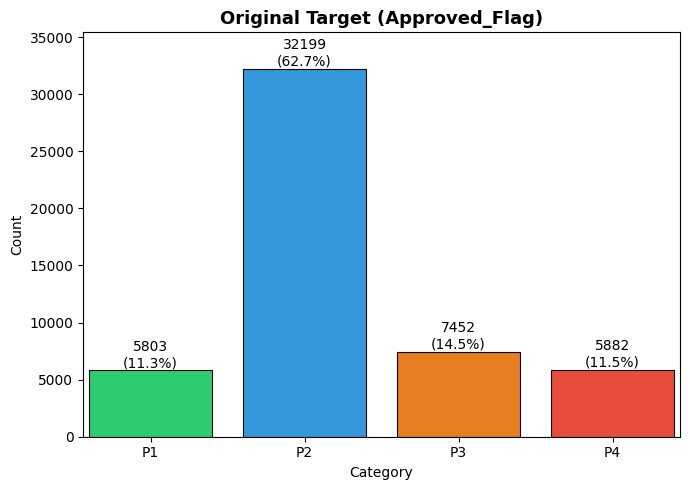

In [20]:
import matplotlib.pyplot as plt

class_counts = df["Approved_Flag"].value_counts().sort_index()
colors = ['#2ecc71', '#3498db', '#e67e22', '#e74c3c']

plt.figure(figsize=(7, 5))
plt.margins(0.01, 0.10)

bars = plt.bar(
    class_counts.index,
    class_counts.values,
    color=colors,
    edgecolor='black',
    linewidth=0.8
)

plt.title("Original Target (Approved_Flag)", fontsize=13, fontweight='bold')
plt.xlabel("Category")
plt.ylabel("Count")

total = class_counts.sum()
for bar, count in zip(bars, class_counts.values):
    pct = count / total * 100
    plt.text(
        bar.get_x() + bar.get_width()/2,
        bar.get_height() + 300,
        f'{count}\n({pct:.1f}%)',
        ha='center',
        fontsize=10
    )

plt.tight_layout()
plt.show()

This shows that P2 is very well represented whereas P1, P3 and P4 are not that well represented. We will have to balance our training models accordingly

## Correlation Analysis

In [21]:
X = df.drop(columns=["Approved_Flag"])
y = df["Approved_Flag"]

In [22]:
# # select only numeric columns for correlation
# numeric_cols = X.select_dtypes(include=[np.number]).columns
# corr_matrix = X[numeric_cols].corr()

# # plot a heatmap of the top features most correlated with the target
# target_corr = X[numeric_cols].corrwith(y).abs().sort_values(ascending=False)
# top_features = target_corr.head(20).index.tolist()

# plt.figure(figsize=(14, 10))
# sns.heatmap(X[top_features].corr(), annot=True, fmt=".2f",
#             cmap="coolwarm", center=0, linewidths=0.5)
# plt.title("Correlation Heatmap – Top 20 Features Most Correlated with Target",
#           fontsize=14, fontweight='bold')
# plt.tight_layout()
# plt.show()

# # show the top 20 features and their correlation with the binary target
# print("\nTop 20 features correlated with Approved_Flag:\n")
# print(target_corr.head(20).to_string())


## Key Risk Indicators

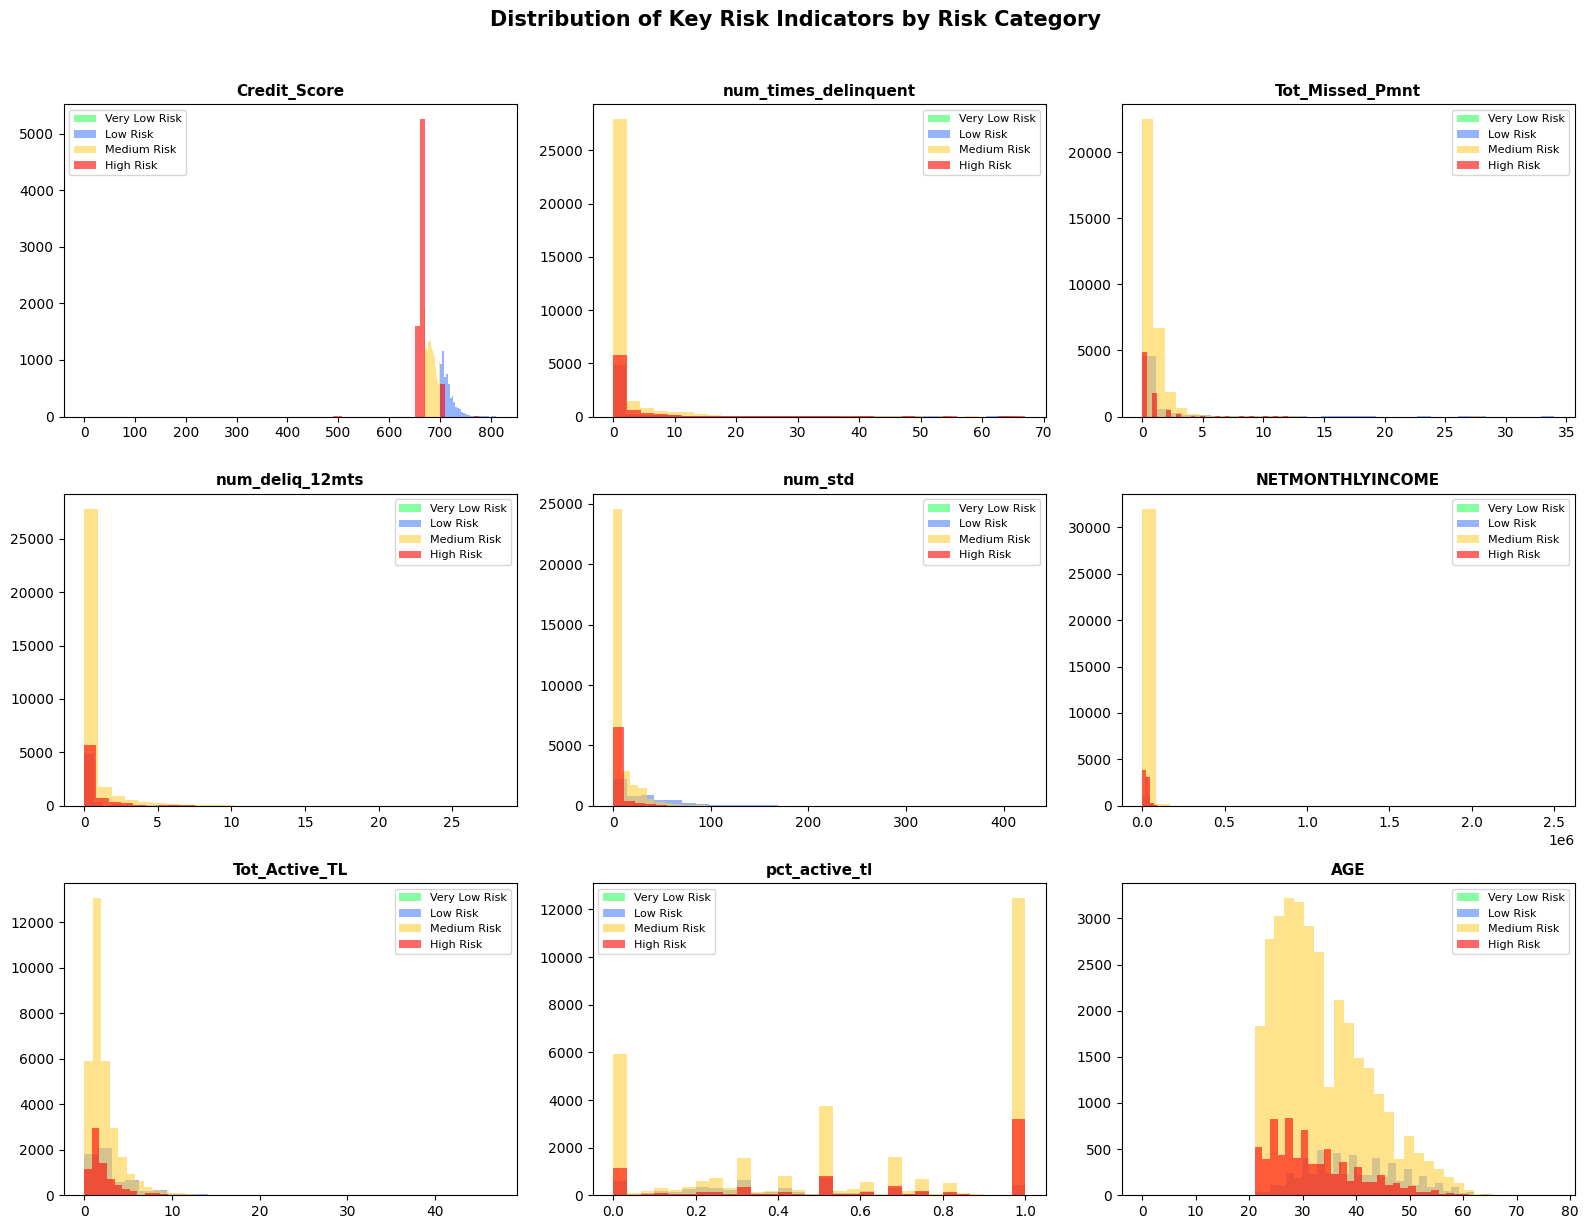


Mean values by risk group:

                      Low Risk (mean)  High Risk (mean)  Difference
Credit_Score                      NaN               NaN         NaN
num_times_delinquent              NaN               NaN         NaN
Tot_Missed_Pmnt                   NaN               NaN         NaN
num_deliq_12mts                   NaN               NaN         NaN
num_std                           NaN               NaN         NaN
NETMONTHLYINCOME                  NaN               NaN         NaN
Tot_Active_TL                     NaN               NaN         NaN
pct_active_tl                     NaN               NaN         NaN
AGE                               NaN               NaN         NaN


In [23]:
# key risk features to compare across low-risk vs high-risk
risk_features = [
    "Credit_Score", 'num_times_delinquent', 'Tot_Missed_Pmnt',
    'num_deliq_12mts', 'num_std', 'NETMONTHLYINCOME',
    'Tot_Active_TL', 'pct_active_tl', 'AGE'
]

fig, axes = plt.subplots(3, 3, figsize=(16, 12))
axes = axes.flatten()

for i, col in enumerate(risk_features):
    if col in X.columns:
        data_very_low  = X.loc[y == "P0", col].dropna()
        data_low = X.loc[y == "P1", col].dropna()
        data_medium = X.loc[y == "P2", col].dropna()
        data_high = X.loc[y == "P3", col].dropna()
        axes[i].hist(data_very_low,  bins=30, alpha=0.6, label='Very Low Risk', color="#38FF63")
        axes[i].hist(data_low, bins=30, alpha=0.6, label='Low Risk', color="#4F81FF")
        axes[i].hist(data_medium, bins=30, alpha=0.6, label='Medium Risk', color="#FFCF3F")
        axes[i].hist(data_high, bins=30, alpha=0.6, label='High Risk', color="#FF0202")
        axes[i].set_title(col, fontsize=11, fontweight='bold')
        axes[i].legend(fontsize=8)

plt.suptitle("Distribution of Key Risk Indicators by Risk Category",
             fontsize=15, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

# summary statistics
print("\nMean values by risk group:\n")
risk_stats = pd.DataFrame({
    'Low Risk (mean)':  X.loc[y == 0, risk_features].mean(),
    'High Risk (mean)': X.loc[y == 1, risk_features].mean()
})
risk_stats['Difference'] = risk_stats['High Risk (mean)'] - risk_stats['Low Risk (mean)']
print(risk_stats.round(2).to_string())


# Getting ready to model

## Encoding Categorical Variables

In [24]:
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)

In [25]:
df.head()

,Total_TL,Tot_Closed_TL,Tot_Active_TL,Total_TL_opened_L6M,Tot_TL_closed_L6M,pct_tl_open_L6M,pct_tl_closed_L6M,pct_active_tl,pct_closed_tl,Total_TL_opened_L12M,Tot_TL_closed_L12M,pct_tl_open_L12M,pct_tl_closed_L12M,Tot_Missed_Pmnt,Auto_TL,CC_TL,Consumer_TL,Gold_TL,Home_TL,PL_TL,Secured_TL,Unsecured_TL,Other_TL,Age_Oldest_TL,Age_Newest_TL,time_since_recent_payment,time_since_first_deliquency,time_since_recent_deliquency,num_times_delinquent,max_delinquency_level,max_recent_level_of_deliq,num_deliq_6mts,num_deliq_12mts,num_deliq_6_12mts,max_deliq_6mts,max_deliq_12mts,num_times_30p_dpd,num_times_60p_dpd,num_std,num_std_6mts,num_std_12mts,num_sub,num_sub_6mts,num_sub_12mts,num_dbt,num_dbt_6mts,num_dbt_12mts,num_lss,num_lss_6mts,num_lss_12mts,recent_level_of_deliq,tot_enq,CC_enq,CC_enq_L6m,CC_enq_L12m,PL_enq,PL_enq_L6m,PL_enq_L12m,time_since_recent_enq,enq_L12m,enq_L6m,enq_L3m,AGE,NETMONTHLYINCOME,Time_With_Curr_Empr,pct_of_active_TLs_ever,pct_opened_TLs_L6m_of_L12m,pct_currentBal_all_TL,CC_Flag,PL_Flag,pct_PL_enq_L6m_of_L12m,pct_CC_enq_L6m_of_L12m,pct_PL_enq_L6m_of_ever,pct_CC_enq_L6m_of_ever,max_unsec_exposure_inPct,HL_Flag,GL_Flag,Credit_Score,Approved_Flag,MARITALSTATUS_Single,EDUCATION_GRADUATE,EDUCATION_OTHERS,EDUCATION_POST-GRADUATE,EDUCATION_PROFESSIONAL,EDUCATION_SSC,EDUCATION_UNDER GRADUATE,GENDER_M,last_prod_enq2_CC,last_prod_enq2_ConsumerLoan,last_prod_enq2_HL,last_prod_enq2_PL,last_prod_enq2_others,first_prod_enq2_CC,first_prod_enq2_ConsumerLoan,first_prod_enq2_HL,first_prod_enq2_PL,first_prod_enq2_others
0,5,4,1,0,0,0.000,0.0,0.200,0.800,0,0,0.00,0.0,0,0,0,0,1,0,4,1,4,0,72.0,18.0,549.0,35.0,15.0,11,29.0,29,0,0,0,0.0,0.0,0,0,21,5,11,0,0,0,0,0,0,0,0,0,29,6.0,0.0,0.0,0.0,6.0,0.0,0.0,566.0,0.0,0.0,0.0,48,51000,114,0.200,0.0,0.798,0,1,0.0,0.0,0.0,0.0,13.333,1,0,696,P2,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,True,False
1,1,0,1,0,0,0.000,0.0,1.000,0.000,1,0,1.00,0.0,0,0,0,1,0,0,0,0,1,0,7.0,7.0,47.0,0.0,0.0,0,0.0,0,0,0,0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,209.0,1.0,0.0,0.0,23,19000,50,1.000,0.0,0.370,0,0,0.0,0.0,0.0,0.0,0.860,0,0,685,P2,True,True,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False
2,8,0,8,1,0,0.125,0.0,1.000,0.000,2,0,0.25,0.0,1,1,0,6,1,0,0,2,6,0,47.0,2.0,302.0,11.0,3.0,9,25.0,25,1,9,8,25.0,25.0,0,0,10,5,10,0,0,0,0,0,0,0,0,0,25,4.0,0.0,0.0,0.0,0.0,0.0,0.0,587.0,0.0,0.0,0.0,40,18,191,1.000,0.5,0.585,0,0,0.0,0.0,0.0,0.0,5741.667,1,0,693,P2,False,False,False,False,False,True,False,True,False,True,False,False,False,False,False,False,False,True
3,1,0,1,1,0,1.000,0.0,1.000,0.000,1,0,1.00,0.0,1,0,0,0,0,0,0,0,1,1,5.0,5.0,74.0,0.0,0.0,0,0.0,0,0,0,0,0.0,0.0,0,0,5,4,5,0,0,0,0,0,0,0,0,0,0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,75.0,2.0,1.0,1.0,34,10000,246,1.000,1.0,0.990,0,0,0.0,0.0,0.0,0.0,9.900,0,0,673,P2,False,False,False,False,False,True,False,True,False,False,False,False,True,False,False,False,False,True
4,3,2,1,0,0,0.000,0.0,0.333,0.667,0,0,0.00,0.0,0,1,0,0,0,0,0,3,0,2,131.0,32.0,583.0,0.0,0.0,0,0.0,0,0,0,0,0.0,0.0,0,0,53,4,16,0,0,0,0,0,0,0,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3951.0,0.0,0.0,0.0,48,15000,75,0.333,0.0,0.000,0,0,0.0,0.0,0.0,0.0,0.000,0,0,753,P1,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False


## Final Feature Matrix

In [26]:
# X = df.drop(columns=["Approved_Flag", "Approved_Flag_binary"])
# y = df["Approved_Flag_binary"]
X = df.drop(columns=["Approved_Flag"])
y = df["Approved_Flag"]

## Train-Test Split

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Model 1: Decision Tree

## Model Training

In [28]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=42, max_depth=5, criterion="gini")
clf = clf.fit(X_train, y_train)

## Model Evaluation

In [29]:
y_pred_dt = clf.predict(X_test)
y_pred_dt

array(['P3', 'P2', 'P2', ..., 'P2', 'P1', 'P2'],
      shape=(10268,), dtype=object)

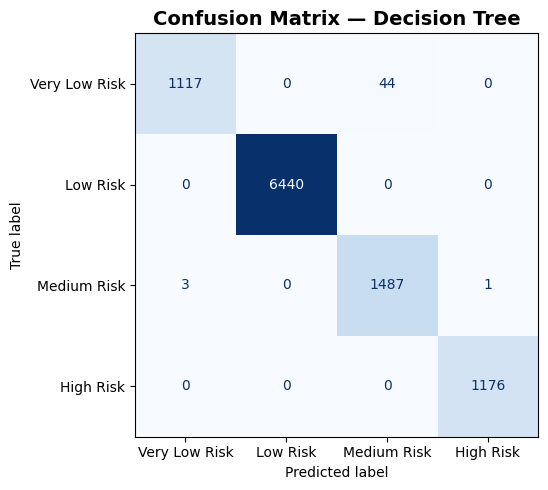

MULTI-CLASS CONFUSION MATRIX INTERPRETATION

Classification Report:

              precision    recall  f1-score   support

          P1       1.00      0.96      0.98      1161
          P2       1.00      1.00      1.00      6440
          P3       0.97      1.00      0.98      1491
          P4       1.00      1.00      1.00      1176

    accuracy                           1.00     10268
   macro avg       0.99      0.99      0.99     10268
weighted avg       1.00      1.00      1.00     10268


Overall Accuracy = 99.5%

KEY OBSERVATIONS:

Class P1:
  True Positives  = 1117
  False Negatives = 44 (Actual P1 predicted as other classes)
  False Positives = 3 (Other classes predicted as P1)

Class P2:
  True Positives  = 6440
  False Negatives = 0 (Actual P2 predicted as other classes)
  False Positives = 0 (Other classes predicted as P2)

Class P3:
  True Positives  = 1487
  False Negatives = 4 (Actual P3 predicted as other classes)
  False Positives = 44 (Other classes predicted as 

In [30]:
evaluate_model(y_test, y_pred_dt, "Decision Tree")

## Feature Importance

Credit_Score                 0.999482
enq_L3m                      0.000164
time_since_recent_payment    0.000154
Age_Oldest_TL                0.000134
EDUCATION_UNDER GRADUATE     0.000066
dtype: float64


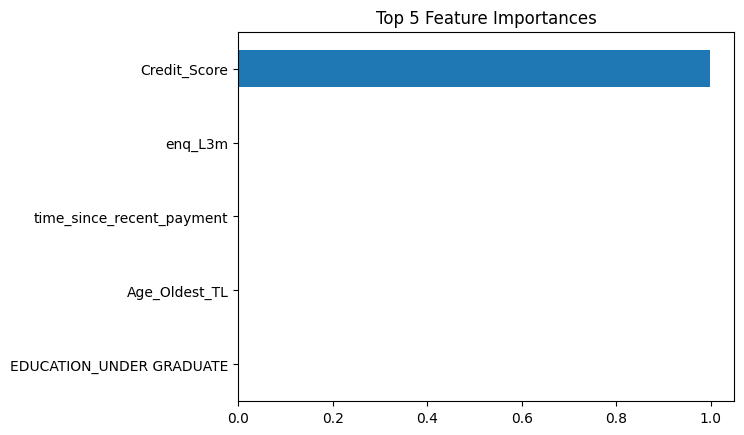

In [31]:
importances = clf.feature_importances_
feature_importances = pd.Series(importances, index=X_train.columns)
feature_importances = feature_importances.sort_values(ascending=False)[:5]

print(feature_importances)

feature_importances.plot(kind="barh")
plt.title("Top 5 Feature Importances")
plt.gca().invert_yaxis()
plt.show()

as we can see, with decision trees, credit score makes a much bigger impact on the score compared to other variables

# Pivoting Our Model

Since our model ended up being highly dependent on credit score, it was simply classifying a lending decision on the previously calculated credit score of the borrower, which is a highly derived value that the CIBL generates and which is usually the only thing lenders use to determine if they should lend to them or not.

Thus credit score on its own provides enough insight to the lender if they should lend money out. However, in order to aid in a lenders decision, we must provide logical reasoning and further insight beyond credit score. In order to do this, we will remove credit score as a data point and retrain our decision tree to see what we end up with.

In [32]:
df.drop("Credit_Score", inplace=True, axis=1)

In [33]:
# final feature matrix
X = df.drop(columns=["Approved_Flag"])
y = df["Approved_Flag"]

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# modelling
clf = DecisionTreeClassifier(random_state=42, max_depth=11, criterion="gini")
clf = clf.fit(X_train, y_train)

# predicting
y_pred_dt_no_cred = clf.predict(X_test)
y_pred_dt_no_cred

array(['P3', 'P2', 'P2', ..., 'P2', 'P2', 'P2'],
      shape=(10268,), dtype=object)

## Model Evaluation (without credit score)

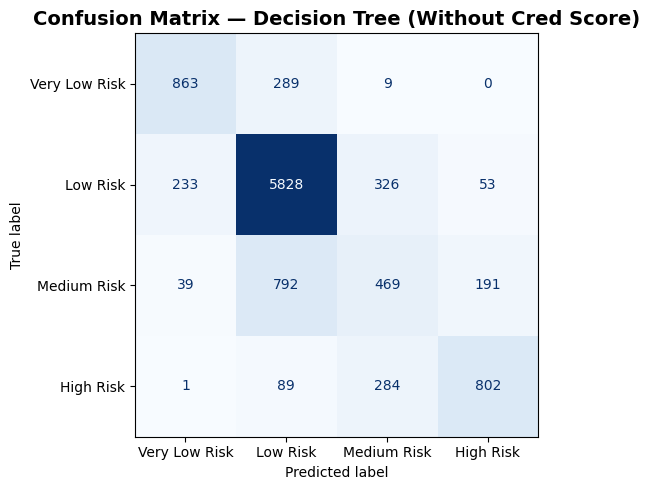

MULTI-CLASS CONFUSION MATRIX INTERPRETATION

Classification Report:

              precision    recall  f1-score   support

          P1       0.76      0.74      0.75      1161
          P2       0.83      0.90      0.87      6440
          P3       0.43      0.31      0.36      1491
          P4       0.77      0.68      0.72      1176

    accuracy                           0.78     10268
   macro avg       0.70      0.66      0.68     10268
weighted avg       0.76      0.78      0.76     10268


Overall Accuracy = 77.5%

KEY OBSERVATIONS:

Class P1:
  True Positives  = 863
  False Negatives = 298 (Actual P1 predicted as other classes)
  False Positives = 273 (Other classes predicted as P1)

Class P2:
  True Positives  = 5828
  False Negatives = 612 (Actual P2 predicted as other classes)
  False Positives = 1170 (Other classes predicted as P2)

Class P3:
  True Positives  = 469
  False Negatives = 1022 (Actual P3 predicted as other classes)
  False Positives = 619 (Other classes pre

In [34]:
evaluate_model(y_test, y_pred_dt_no_cred, "Decision Tree (Without Cred Score)")

## Feature Importance

Age_Oldest_TL                   0.234641
enq_L3m                         0.219858
time_since_recent_deliquency    0.110784
num_std_12mts                   0.085442
time_since_recent_enq           0.080028
dtype: float64


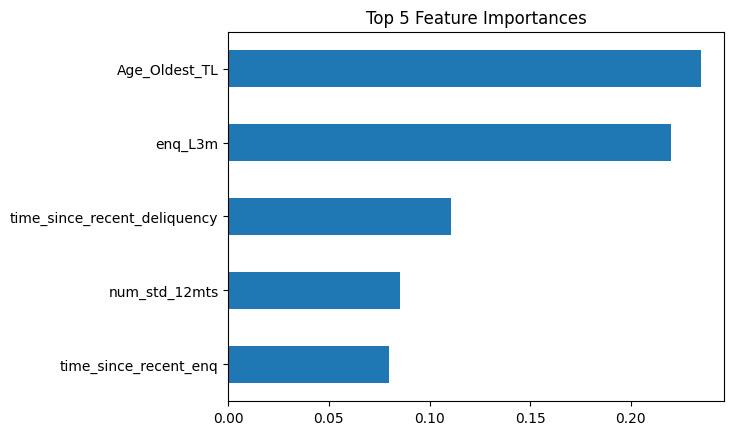

In [35]:
importances = clf.feature_importances_
feature_importances = pd.Series(importances, index=X_train.columns)
feature_importances = feature_importances.sort_values(ascending=False)[:5]

print(feature_importances)

feature_importances.plot(kind="barh")
plt.title("Top 5 Feature Importances")
plt.gca().invert_yaxis()
plt.show()

## Current Insights
Now the most important features have become the age of the oldest opened account (how long they have been with the specific bank), the number of enquiries in the last 3 months (showing how interested they are in borrowing) and the time since the most recent delinquency (if any). These are much more valid and insightful to a manual lender in the bank who needs to make a decision based on not only credit score, but on also behavioural risk modelling and an explainable decision policy, rather than a simple yes or no based on score.

## Decision Path

In [36]:
from sklearn.tree import export_text

tree_rules = export_text(clf, feature_names=list(X.columns))
print(tree_rules)

|--- enq_L3m <= 2.50
|   |--- Age_Oldest_TL <= 85.50
|   |   |--- time_since_recent_deliquency <= 2.50
|   |   |   |--- num_std <= 36.50
|   |   |   |   |--- pct_PL_enq_L6m_of_ever <= 0.94
|   |   |   |   |   |--- time_since_recent_enq <= 72.50
|   |   |   |   |   |   |--- Age_Oldest_TL <= 17.50
|   |   |   |   |   |   |   |--- num_std <= 2.50
|   |   |   |   |   |   |   |   |--- enq_L3m <= 1.50
|   |   |   |   |   |   |   |   |   |--- first_prod_enq2_ConsumerLoan <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- PL_enq <= 1.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: P2
|   |   |   |   |   |   |   |   |   |   |--- PL_enq >  1.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: P2
|   |   |   |   |   |   |   |   |   |--- first_prod_enq2_ConsumerLoan >  0.50
|   |   |   |   |   |   |   |   |   |   |--- AGE <= 40.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: P2
|   |   |   |   |   |   |   |   |   |   |--- AGE >  40.50
|   |   |   |   |   |   |   |   

# Model 2: Random Forest

Based on our insights and decisions, we will be training a random forest model, which is basically an ensemble of multiple decision trees, improving accuracy.
However since it is an amalgamation of multiple decision trees, we wont be able to provide a clear decision path once the model is trained for our decisions.

For transparency and clarity, the decision path provided from the decision tree can be loosely referred to.

However, for the most accurate prediction and insight, we are going to use the random forest model.

In [37]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    "n_estimators": [200, 300],
    "max_depth": [None, 15, 25],
    "min_samples_leaf": [1, 3, 5]
}

grid = GridSearchCV(
    RandomForestClassifier(class_weight="balanced", random_state=42),
    param_grid,
    cv=5,
    scoring="f1_macro",
    n_jobs=-1
)

grid.fit(X_train, y_train)

rf_classifier = grid.best_estimator_

In [38]:
print("Best Parameters:")
print(grid.best_params_)

print("\nBest CV Score (Macro F1):")
print(grid.best_score_)

Best Parameters:
{'max_depth': None, 'min_samples_leaf': 3, 'n_estimators': 300}

Best CV Score (Macro F1):
0.6981392263523633


In [39]:
y_pred_rf = rf_classifier.predict(X_test)

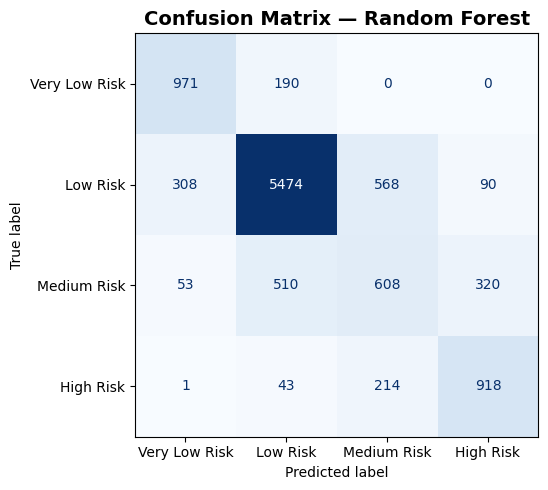

MULTI-CLASS CONFUSION MATRIX INTERPRETATION

Classification Report:

              precision    recall  f1-score   support

          P1       0.73      0.84      0.78      1161
          P2       0.88      0.85      0.86      6440
          P3       0.44      0.41      0.42      1491
          P4       0.69      0.78      0.73      1176

    accuracy                           0.78     10268
   macro avg       0.68      0.72      0.70     10268
weighted avg       0.78      0.78      0.78     10268


Overall Accuracy = 77.6%

KEY OBSERVATIONS:

Class P1:
  True Positives  = 971
  False Negatives = 190 (Actual P1 predicted as other classes)
  False Positives = 362 (Other classes predicted as P1)

Class P2:
  True Positives  = 5474
  False Negatives = 966 (Actual P2 predicted as other classes)
  False Positives = 743 (Other classes predicted as P2)

Class P3:
  True Positives  = 608
  False Negatives = 883 (Actual P3 predicted as other classes)
  False Positives = 782 (Other classes predi

In [40]:
evaluate_model(y_test, y_pred_rf, "Random Forest")

### Insight
The recall for P3 is very low (0.41) and the model is having trouble correctly classifying P3. There are a lot of false positives and false negatives. But if we look at our class distribution from EDA, we can see that P2 dominates our learning data set. So even with `class_weight="balanced"`, the random forest prefers P2 regardless.

# Model 3: Gradient Boosting

Lets perform cost-sensitive boosting with stronger penalty on P3. We're doing this in order to boost the recall on P3
The ideas is to that we want to mark borderline P2 as P3 to be more cautious in lending credit.

In [41]:
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.utils.class_weight import compute_sample_weight

gb = HistGradientBoostingClassifier(
    max_depth=8,
    learning_rate=0.05,
    max_iter=300,
    random_state=42
)

sample_weights = compute_sample_weight(
    class_weight={
        "P1":1.0,
        "P2":1.0,
        "P3":3.0,
        "P4":1.5
    },
    y=y_train
)

gb.fit(X_train, y_train, sample_weight=sample_weights)

y_pred_gb = gb.predict(X_test)

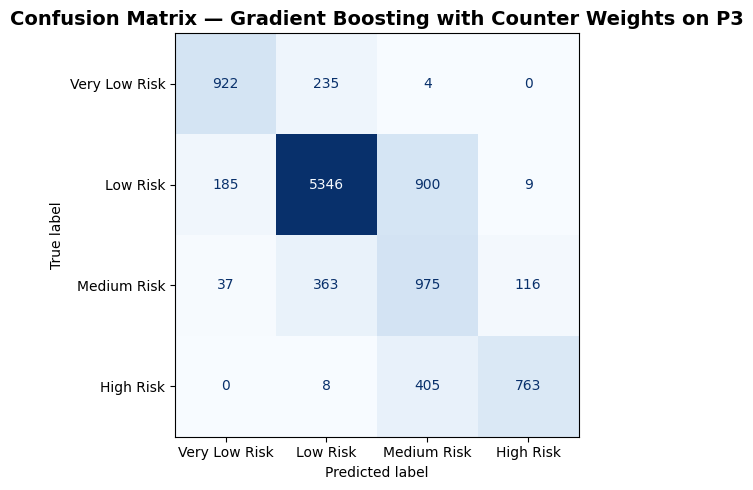

MULTI-CLASS CONFUSION MATRIX INTERPRETATION

Classification Report:

              precision    recall  f1-score   support

          P1       0.81      0.79      0.80      1161
          P2       0.90      0.83      0.86      6440
          P3       0.43      0.65      0.52      1491
          P4       0.86      0.65      0.74      1176

    accuracy                           0.78     10268
   macro avg       0.75      0.73      0.73     10268
weighted avg       0.81      0.78      0.79     10268


Overall Accuracy = 78.0%

KEY OBSERVATIONS:

Class P1:
  True Positives  = 922
  False Negatives = 239 (Actual P1 predicted as other classes)
  False Positives = 222 (Other classes predicted as P1)

Class P2:
  True Positives  = 5346
  False Negatives = 1094 (Actual P2 predicted as other classes)
  False Positives = 606 (Other classes predicted as P2)

Class P3:
  True Positives  = 975
  False Negatives = 516 (Actual P3 predicted as other classes)
  False Positives = 1309 (Other classes pre

In [42]:
evaluate_model(y_test, y_pred_gb, "Gradient Boosting with Counter Weights on P3")

# Model Comparison

## Table of Metrics

## Discussion